# Bottle of Wine Price Prediction by Group 12

Description: Let's try to predict the price of a bottle of wine based on a collection of over one hundred thousand reviews and other product features.

Evaluation: Root Mean Squared Error (RMSE).  
RMSE = sqrt (mean ((predicted-true) ^ 2))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns
pd.set_option('display.max_columns', None)

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define scoring metric
def rmse_score(y_actual, y_predicted):
    return np.sqrt(np.mean(np.square(y_actual - y_predicted)))

In [3]:
# import train and test data.
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv", index_col='id')

In [4]:
train_df.columns, test_df.columns

(Index(['country', 'description', 'designation', 'points', 'price', 'province',
        'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
        'variety', 'winery', 'id'],
       dtype='object'),
 Index(['index', 'country', 'description', 'designation', 'points', 'price',
        'province', 'region_1', 'region_2', 'taster_name',
        'taster_twitter_handle', 'title', 'variety', 'winery'],
       dtype='object'))

In [5]:
# drop id columns (not necessary)
# target_df = train_df[["price"]]

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["index", "price"], inplace=True)

#pd.concat([train_df, price])

In [6]:
# Column of train one more than test because of the price column
train_df.shape, test_df.shape

((175000, 13), (83210, 12))

In [7]:
train_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
country,Portugal,France,France,US,US,Spain,France,Italy,US,Italy
description,This is a fine rich balanced wine. It has ripe...,"A solid, chunky wine, with a structure that is...","This is powerful and concentrated, with the hi...","Rich, ripe and oaky, this Petite Sirah charms ...",This wine is a unique in the state blend and f...,This brut nature is citric and bubbly on the p...,"A ripe wine that has red-berry fruits, slices ...",From one of Sicily's most beautiful and promis...,This wine plays close to the edge of overripe-...,This basic Prosecco is perfectly quaffable tha...
designation,Vila Santa Reserva,NaN,NaN,Thompson Vineyard,McKinley Springs Vineyard,Brut Nature Reserva,Cuvée Prestige,Baccante,NaN,Lellè Extra Dry
points,88.8709,88.0417,94.085,89.8698,89.0177,83.1187,88.3205,85.1735,85.9087,81.9295
price,20,28,130,34,24,13,35,42,38,14
province,Alentejano,Bordeaux,Bordeaux,California,Washington,Catalonia,Bordeaux,Sicily & Sardinia,California,Veneto
region_1,NaN,Lalande de Pomerol,Saint-Émilion,Santa Barbara County,Horse Heaven Hills,Cava,Bordeaux Supérieur,Sicilia,Russian River Valley,Prosecco
region_2,NaN,NaN,NaN,Central Coast,Columbia Valley,NaN,NaN,NaN,Sonoma,NaN
taster_name,NaN,NaN,NaN,NaN,Sean P. Sullivan,Michael Schachner,Roger Voss,NaN,Virginie Boone,NaN
taster_twitter_handle,NaN,NaN,NaN,NaN,@wawinereport,@wineschach,@vossroger,NaN,@vboone,NaN


In [51]:
test_df.head(5).T

id,0,1,2,3,4
country,US,France,US,US,US
description,"Sweet new oak stands out, giving this Cabernet...",Charming raspberry aromas intertwine with scen...,"Ripe blackberry, leather and soy show on the n...",White flowers and wild anise give this a crisp...,Pinot Gris has been making inroads in Washingt...
designation,3D,Heluicum,Estate,NaN,NaN
points,95.0365,90.9664,88.9644,89.9604,88.0755
province,California,Rhône Valley,California,California,Washington
region_1,St. Helena,Collines Rhôdaniennes,Santa Ynez Valley,Sonoma Coast,Columbia Valley (WA)
region_2,Napa,NaN,Central Coast,Sonoma,Columbia Valley
taster_name,NaN,NaN,Matt Kettmann,Virginie Boone,Sean P. Sullivan
taster_twitter_handle,NaN,NaN,@mattkettmann,@vboone,@wawinereport
title,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,NaN,Brave & Maiden 2013 Estate Cabernet Franc (San...,Les Voleurs 2013 Chardonnay (Sonoma Coast),Chateau Ste. Michelle 2015 Pinot Gris (Columbi...


In [52]:
# Check if similar amount of null values in train and test columns
a = train_df.drop(columns=["price"]).count()
b = test_df.count()
pd.DataFrame({"train_data (17500)": a, "test_data (83210)": b})

,train_data (17500),test_data (83210)
country,174953,83193
description,175000,83210
designation,122734,58386
points,175000,83210
province,174953,83193
region_1,146466,69327
region_2,75394,35602
taster_name,65509,30970
taster_twitter_handle,62190,29369
title,82189,38786


In [53]:
# Check data types
train_df.info(),  test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 13 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
dtypes: float64(2), object(11)
memory usage: 17.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83210 entries, 0 to 83209
Data columns (total 12 columns):
country                  83193 non-null object
description              83210 non-null object
designatio

(None, None)

Observations: Only one numeric predictor; Many columns with null values

In [54]:
# % of  NULL values
null_values = [train_df[x].isnull().sum()/1750 for x in train_df.columns ]
pd.DataFrame(null_values, index=train_df.columns, columns=["% Null Values in Train Set"])

,% Null Values in Train Set
country,0.026857
description,0.000000
designation,29.866286
points,0.000000
price,0.000000
province,0.026857
region_1,16.305143
region_2,56.917714
taster_name,62.566286
taster_twitter_handle,64.462857


Observation: Designation, regions, tasters, title have sparse vectors

In [55]:
train_df.describe()

,points,price
count,175000.000000,175000.000000
mean,88.083987,34.304400
std,3.157001,38.398146
min,79.636128,4.000000
25%,85.971283,16.000000
50%,87.981631,25.000000
75%,90.085631,40.000000
max,100.220603,2500.000000


Observation: Points range from 79 to 100(approx), with a mean of 88. Price has a large range and probably skewed

In [56]:
# Using log of price to reduce large values
# train_price = np.log(train_df["price"])
train_df["price_trans"] = train_df["price"]

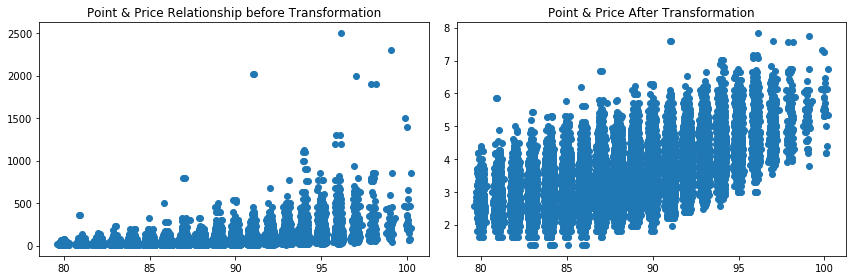

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(train_df['points'], train_df['price'])
ax[1].scatter(train_df['points'], train_df['price_trans'])

ax[0].set_title("Point & Price Relationship before Transformation")
ax[1].set_title("Point & Price After Transformation")

plt.tight_layout()

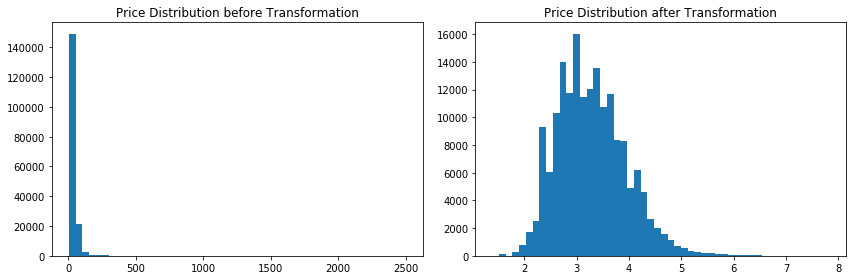

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(train_df['price'], bins=50)
ax[1].hist(train_df['price_trans'], bins=50)

ax[0].set_title("Price Distribution before Transformation")
ax[1].set_title("Price Distribution after Transformation")

plt.tight_layout()

Observation: Price was left skewed, now normally distributed

In [57]:
print(train_df[['points', 'price']].corr())
print(train_df[['points', 'price_trans']].corr())

          points     price
points  1.000000  0.443276
price   0.443276  1.000000
               points  price_trans
points       1.000000     0.443276
price_trans  0.443276     1.000000


Observation: Transformed price has better correlation and distribution

### Imputation / Dealing with null values

Missing: **Variety**  
Missing variety can be found in title

In [58]:
train_df[train_df['variety'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_trans
86403,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88.046742,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen,17.0


In [59]:
variety = train_df[(train_df['province'] == 'Maipo Valley') & (train_df['winery'] == 'Carmen')]['variety'].mode()[0]
print(variety)

train_df['variety'][86403] = variety

CABERNET SAUVIGNON


Missing: **Designation**  
Information of 'designation' is contained in 'title'

In [60]:
import re

Missing: **Region 1**

In [61]:
train_df[['region_1', 'title']].head(10)

,region_1,title
0,NaN,NaN
1,Lalande de Pomerol,NaN
2,Saint-Émilion,NaN
3,Santa Barbara County,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...
4,Horse Heaven Hills,Syncline 2016 McKinley Springs Vineyard Rosé (...
5,Cava,Mas Fi NV Brut Nature Reserva Sparkling (Cava)
6,Bordeaux Supérieur,Château Tayet 2014 Cuvée Prestige (Bordeaux S...
7,Sicilia,NaN
8,Russian River Valley,Matrix 2013 Pinot Noir (Russian River Valley)
9,Prosecco,NaN


In [62]:
# Extract region from title
def get_regions(string):
    if type(string) is str:
        try:
            detached_string = re.search(r'\((.*?)\)', string).group(1).strip()
            return detached_string
        except:
            return np.nan
    else: return np.nan
train_df["new_region1"]= train_df["title"].apply(get_regions)
test_df["new_region1"]= test_df["title"].apply(get_regions)

train_df["new_region1"].isna().sum(), test_df["new_region1"].isna().sum()

(98630, 47185)

In [63]:
# Check current number of NA values
train_df["region_1"].isna().sum(), train_df["new_region1"].isna().sum()

(28534, 98630)

In [64]:
train_df.region_1.fillna(train_df.new_region1, inplace=True)
test_df.region_1.fillna(test_df.new_region1, inplace=True)
del train_df['new_region1']
del test_df['new_region1']

#Check number after fillna
train_df["region_1"].isna().sum()

15615

In [65]:
train_df['region_1'].sort_values()

25966     Abruzzo
169633    Abruzzo
147615    Abruzzo
30915     Abruzzo
95298     Abruzzo
           ...   
174913        NaN
174921        NaN
174945        NaN
174961        NaN
174962        NaN
Name: region_1, Length: 175000, dtype: object

### Feature Engineering

### Points

Source: https://towardsdatascience.com/wine-ratings-prediction-using-machine-learning-ce259832b321  
https://towardsdatascience.com/predicting-wine-quality-using-text-reviews-8bddaeb5285d  
Range of Points is 79 to 101  
1 -> Points 80 to 82 (Acceptable wines)  
2 -> Points 83 to 86 (Good wines)  
3 -> Points 87 to 89 (Very Good wines)  
4 -> Points 90 to 93 (Excellent wines)  
5 -> Points 94 to 101 (Superb wines)  

In [66]:
def choose_points(point):
    if   point >= 94: return 5
    elif point >= 90: return 4
    elif point >= 87: return 3
    elif point >= 83: return 2
    else: return 1

train_df['ratings'] = train_df['points'].apply(choose_points)
test_df['ratings'] = test_df['points'].apply(choose_points)

train_df.drop(columns=['points'], inplace=True)
test_df.drop(columns=['points'], inplace=True)

In [67]:
train_df[['ratings', 'price_trans']].corr()

,ratings,price_trans
ratings,1.000000,0.407483
price_trans,0.407483,1.000000


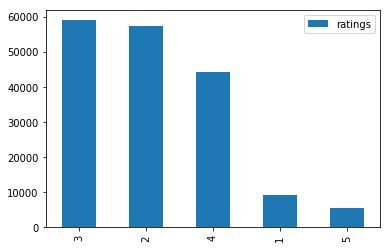

In [24]:
train_df['ratings'].value_counts().to_frame().plot(kind='bar')

Observation: Imbalanced data cos some ratings have low data

### Countries

In [68]:
# Data Source from Statistics Times
# df_countries = pd.read_html('http://statisticstimes.com/geography/countries-by-continents.php')

# convert countries into regions
# country_region = pd.concat([df_countries[i] for i in np.arange(2, 8)])

# country_region.to_csv('country_region')
country_region = pd.read_csv('country_region.csv', index_col='Country/Territory' )
country_region.tail()

,Region
Country/Territory,
Tonga,Polynesia
Tuvalu,Polynesia
Wallis and Futuna Islands,Polynesia
None,None
US-France,Western Europe


In [69]:
def region(country):
    return country_region.loc[country]['Region']

train_df['country'].fillna(value='None', inplace=True)
test_df['country'].fillna(value='None', inplace=True)

train_df['country_region'] = train_df['country'].map(region)
test_df['country_region'] = test_df['country'].map(region)

#train_df.drop(columns=['country'], inplace=True)
#test_df.drop(columns=['country'], inplace=True)

In [27]:
train_df['country_region'].tail()

174995    Northern America
174996     Southern Europe
174997     Southern Europe
174998    Northern America
174999    Northern America
Name: country_region, dtype: object

In [28]:
train_df['country_region'].value_counts()

Northern America             79437
Southern Europe              41408
Western Europe               28533
South America                13408
Australia and New Zealand     7886
Southern Africa               2405
Western Asia                   994
Eastern Europe                 687
Central America                 86
Northern Europe                 59
None                            47
Northern Africa                 30
Southern Asia                   14
Eastern Asia                     6
Name: country_region, dtype: int64

In [29]:
price_per_region = train_df.groupby('country_region').mean()['price'].to_frame().reset_index()

Text(0, 0.5, 'Price')

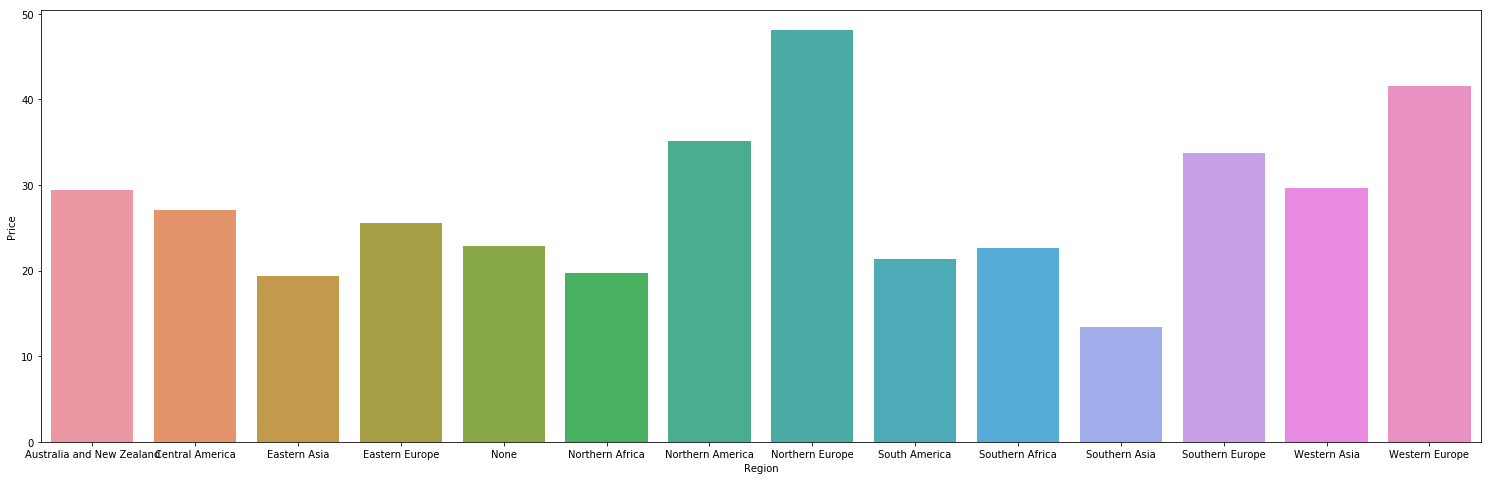

In [31]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot("country_region", "price", data=price_per_region, ax=ax)

ax.set_xlabel('Region')
ax.set_ylabel('Price')


Observation: On average, Northern europe and Western wines are more expensive

### Tasters

Text(0, 0.5, 'Ratings')

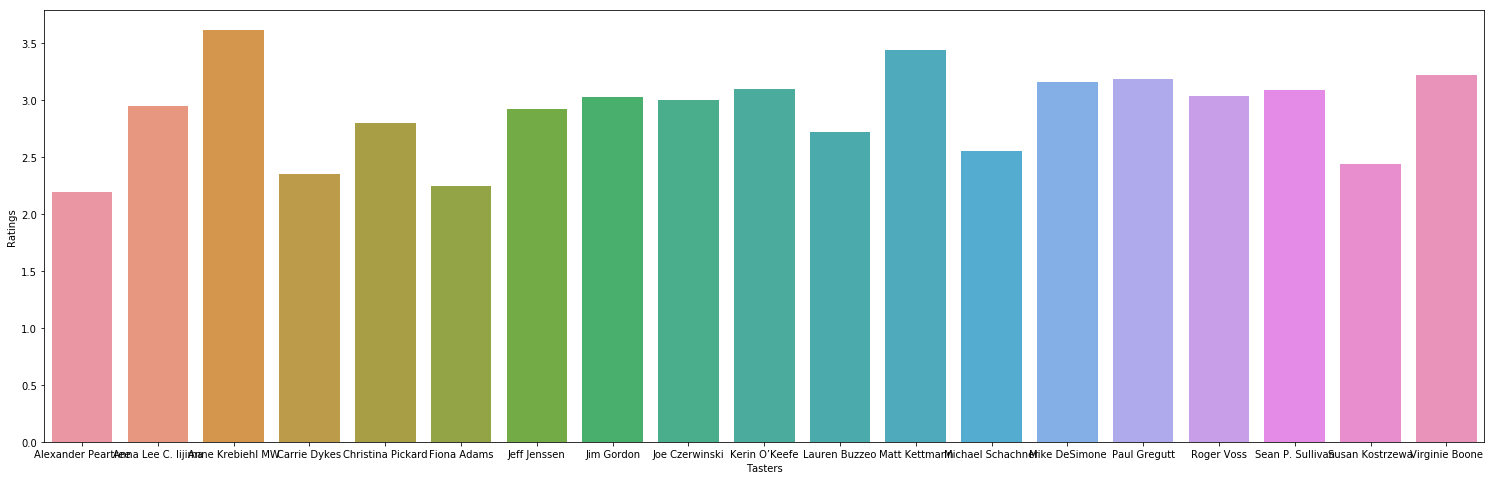

In [27]:
tasters = train_df.groupby('taster_name').mean()['ratings'].to_frame().reset_index()

fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot("taster_name", "ratings", data=tasters, ax=ax)

ax.set_xlabel('Tasters')
ax.set_ylabel('Ratings')

Observation: Not much bias in their ratings

### Twitter Handle

In [70]:
# Create column to check if user has twitter handle
train_df['has_twit_handle'] = train_df['taster_twitter_handle'].notnull()
test_df['has_twit_handle'] = test_df['taster_twitter_handle'].notnull()

# Convert bool to numeric
train_df['has_twit_handle'] = train_df['has_twit_handle'].astype(int)
test_df['has_twit_handle'] = test_df['has_twit_handle'].astype(int)

In [71]:
# Drop twitter handle column
train_df.drop(columns=["taster_twitter_handle"], inplace=True)
test_df.drop(columns=["taster_twitter_handle"], inplace=True)

In [32]:
train_df['has_twit_handle'].head()

0    0
1    0
2    0
3    0
4    1
Name: has_twit_handle, dtype: int64

### Title

In [72]:
# Extract year from title
train_df['title'].fillna(value='None', inplace=True)

def extract_year(string):
    if type(string) is str:
        digit = [int(s) for s in string.split() if s.isdigit()]
        if digit and len(str(digit[0])) == 4:
            return digit[0]
        else: return np.nan
    return np.nan

train_df['title_year'] = train_df['title'].apply(extract_year)
test_df['title_year'] = test_df['title'].apply(extract_year)

train_df['title'].replace({'None':np.nan}, inplace=True)

In [34]:
train_df['title_year'].value_counts()

2013.0    10229
2012.0     9951
2014.0     9934
2011.0     7674
2010.0     7494
          ...  
1947.0        1
1945.0        1
1934.0        1
1927.0        1
1070.0        1
Name: title_year, Length: 79, dtype: int64

### Encoding

In [35]:
# Find number of unique values in each column
train_df.nunique(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 16 columns):
country            175000 non-null object
description        175000 non-null object
designation        122734 non-null object
price              175000 non-null float64
province           174953 non-null object
region_1           159385 non-null object
region_2           75394 non-null object
taster_name        65509 non-null object
title              82189 non-null object
variety            175000 non-null object
winery             175000 non-null object
price_trans        175000 non-null float64
ratings            175000 non-null int64
country_region     175000 non-null object
has_twit_handle    175000 non-null int64
title_year         78991 non-null float64
dtypes: float64(3), int64(2), object(11)
memory usage: 21.4+ MB


(country                46
 description        123811
 designation         37931
 price                 387
 province              468
 region_1             1619
 region_2               18
 taster_name            19
 title               77411
 variety               706
 winery              16968
 price_trans           387
 ratings                 5
 country_region         14
 has_twit_handle         2
 title_year             79
 dtype: int64, None)

In [73]:
# !pip install category_encoders
import category_encoders as ce

# https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
target_df = train_df['price_trans']
train_df.drop(columns=['price', 'price_trans'], inplace=True)

In [74]:
train_df.shape, test_df.shape

((175000, 14), (83210, 14))

In [75]:
encoder = ce.LeaveOneOutEncoder(cols=['country','designation', 'province',
        'region_1', 'region_2', 'taster_name', 'title', 'variety', 'winery', 'country_region', 'title_year'], random_state=42)
encoder.fit(train_df, target_df)

LeaveOneOutEncoder(cols=['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'title', 'variety', 'winery', 'country_region', 'title_year'],
          drop_invariant=False, handle_missing='value',
          handle_unknown='value', random_state=42, return_df=True,
          sigma=None, verbose=0)

In [76]:
train_df_encoded = encoder.transform(train_df)
test_df_encoded = encoder.transform(test_df)

In [77]:
train_df_encoded.head().T

,0,1,2,3,4
country,26.0605,43.3673,43.3673,35.1531,35.1531
description,This is a fine rich balanced wine. It has ripe...,"A solid, chunky wine, with a structure that is...","This is powerful and concentrated, with the hi...","Rich, ripe and oaky, this Petite Sirah charms ...",This wine is a unique in the state blend and f...
designation,20,28.6454,28.6454,36.6122,28.7273
province,22.4616,40.652,40.652,37.2681,30.9779
region_1,25.6488,32.2576,67.7313,29.604,31.3036
region_2,33.4931,33.4931,33.4931,33.6418,31.3066
taster_name,33.8917,33.8917,33.8917,33.8917,34.2159
title,33.3159,33.3159,33.3159,34.3044,24
variety,24.2853,48.4088,48.4088,30.2873,18.2635
winery,18.9697,28,135,38.2941,28.4574


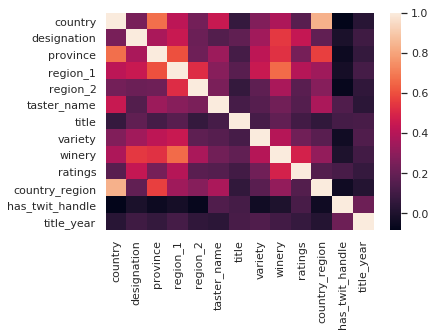

In [99]:
sns.heatmap(train_df_encoded.corr())

In [78]:
# Find number of words in each description. Naive
train_df_encoded['no_of_words'] = train_df_encoded['description'].apply(lambda x: len(x.split()))
test_df_encoded['no_of_words'] = test_df_encoded['description'].apply(lambda x: len(x.split()))

### Create Polynomial Interactions

In [79]:
train_df_num = train_df_encoded[['country','designation', 'province',
        'region_1', 'region_2', 'taster_name', 'title', 'variety', 'winery', 'country_region', 'ratings', 'no_of_words']]
train_df_num.columns

Index(['country', 'designation', 'province', 'region_1', 'region_2',
       'taster_name', 'title', 'variety', 'winery', 'country_region',
       'ratings', 'no_of_words'],
      dtype='object')

In [80]:
num_col_len = len(train_df_num.columns)
for i in range(num_col_len-1):
    col1 = train_df_num.columns[i]
    train_df_encoded[f"{col1}_{col1}"] = train_df_encoded[col1]*train_df_encoded[col1]
    test_df_encoded[f"{col1}_{col1}"] = test_df_encoded[col1]*test_df_encoded[col1]

In [81]:
# Create feature interactions among numerical variables
num_col_len = len(train_df_num.columns)
for i in range(num_col_len-1):
    col1 = train_df_num.columns[i]
    for j in range(i+1, num_col_len):
        col2 = train_df_num.columns[j]
        train_df_encoded[f"{col1}_{col2}"] = train_df_encoded[col1]*train_df_encoded[col2]
        test_df_encoded[f"{col1}_{col2}"] = test_df_encoded[col1]*test_df_encoded[col2]

In [82]:
train_df_encoded.columns

Index(['country', 'description', 'designation', 'province', 'region_1',
       'region_2', 'taster_name', 'title', 'variety', 'winery', 'ratings',
       'country_region', 'has_twit_handle', 'title_year', 'no_of_words',
       'country_country', 'designation_designation', 'province_province',
       'region_1_region_1', 'region_2_region_2', 'taster_name_taster_name',
       'title_title', 'variety_variety', 'winery_winery',
       'country_region_country_region', 'ratings_ratings',
       'country_designation', 'country_province', 'country_region_1',
       'country_region_2', 'country_taster_name', 'country_title',
       'country_variety', 'country_winery', 'country_country_region',
       'country_ratings', 'country_no_of_words', 'designation_province',
       'designation_region_1', 'designation_region_2',
       'designation_taster_name', 'designation_title', 'designation_variety',
       'designation_winery', 'designation_country_region',
       'designation_ratings', 'designatio

### Description

In [83]:
from sklearn.feature_extraction import text

In [84]:
train_df['description'].head()

0    This is a fine rich balanced wine. It has ripe...
1    A solid, chunky wine, with a structure that is...
2    This is powerful and concentrated, with the hi...
3    Rich, ripe and oaky, this Petite Sirah charms ...
4    This wine is a unique in the state blend and f...
Name: description, dtype: object

In [10]:
# Find most frequently occuring words and their count or percentage
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# set seaborn style 
sns.set(style="whitegrid")

stopwords = set(stopwords.words('english'))
# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

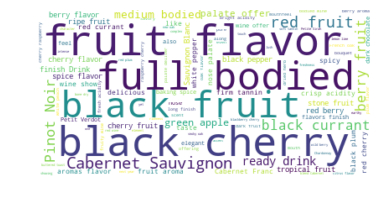

In [82]:
# Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(desc for desc in train_df.description)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white",
                      stopwords=stopwords
                     ).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review.png")

Text(0.5, 1.0, '% Occurrence of Most Frequent Words')

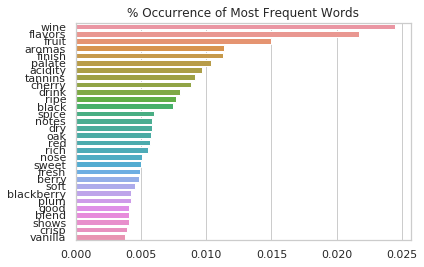

In [83]:
def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

cleaned_description = train_df["description"].apply(clean_description)

word_occurrence = cleaned_description.str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

Observation: Wine and flavors are the most occuring words in the corpus of description

In [9]:
import string
from nltk.tokenize import sent_tokenize, word_tokenize
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stopwords, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

Sentiment Analysis of Description

TD-idf

In [12]:
import re

In [16]:
# Convert text to bag of words
from sklearn.feature_extraction import text
bow_transform = text.CountVectorizer(stop_words=stopwords, 
                                     max_df=0.7, 
                                     min_df=7, 
                                     max_features=100,
                                     tokenizer=tokenize,
                                     binary=True
                                    )
all_desc = np.append(train_df['description'].values, test_df['description'].values)
all_bow = bow_transform.fit_transform(all_desc)
# train_bow = bow_transform.fit_transform()
# test_bow = bow_transform.transform(test_df['description'])
len(bow_transform.vocabulary_)

100

In [20]:
bow_transform.vocabulary_

{'fine': 33,
 'rich': 74,
 'balanced': 6,
 'wine': 97,
 'ripe': 75,
 'fruits': 40,
 'black': 9,
 'mineral': 58,
 'full': 42,
 'juicy': 47,
 'acidity': 0,
 'drink': 30,
 'structure': 83,
 'tannins': 88,
 'style': 84,
 'fresh': 38,
 'sweet': 85,
 'plum': 71,
 'flavors': 37,
 'concentrated': 24,
 'age': 1,
 'cabernet': 14,
 'sauvignon': 76,
 'blend': 11,
 'dark': 28,
 'blackberry': 10,
 'cherry': 18,
 'chocolate': 19,
 'long': 54,
 'finish': 34,
 'vineyard': 94,
 'peach': 67,
 'aromas': 4,
 'light': 50,
 'notes': 62,
 'citrus': 20,
 'dry': 31,
 'palate': 66,
 'lemon': 48,
 'red': 73,
 'berry': 7,
 'fruit': 39,
 'one': 65,
 'chardonnay': 16,
 'bright': 13,
 'clean': 21,
 'years': 99,
 'spice': 81,
 'touch': 92,
 'syrah': 86,
 'dried': 29,
 'pepper': 69,
 'slightly': 78,
 'herbal': 46,
 'lime': 52,
 'toast': 91,
 'vanilla': 93,
 'cola': 22,
 'pinot': 70,
 'like': 51,
 'nose': 61,
 'green': 44,
 'crisp': 26,
 'medium': 56,
 'apple': 3,
 'white': 96,
 'oak': 63,
 'offers': 64,
 'tart': 89,
 '

In [18]:
all_bow.toarray().shape

(258210, 100)

In [88]:
tfidf_trfm = text.TfidfTransformer()
tfidf = tfidf_trfm.fit_transform(all_bow)

In [89]:
new_cols = bow_transform.get_feature_names()

In [90]:
df_desc = pd.DataFrame(tfidf.toarray(), columns=new_cols)
df_desc.shape

(258210, 100)

In [91]:
train_df_encoded.rename(columns = {"winery": "winery_col", 
                     "variety":"variety_col"}, 
                                 inplace = True)
test_df_encoded.rename(columns = {"winery": "winery_col", 
                     "variety":"variety_col"}, 
                                 inplace = True)

train_df_desc = pd.DataFrame(tfidf[0:175000].toarray(), columns=new_cols)
test_df_desc = pd.DataFrame(tfidf[175000: ].toarray(), columns=new_cols)

# Combine dataframe
train_df_concat = train_df_encoded.join(train_df_desc)
test_df_concat =test_df_encoded.join(test_df_desc)

train_df_concat.shape, test_df_concat.shape

((175000, 192), (83210, 192))

In [92]:
del train_df_concat['description']
del test_df_concat['description']

In [93]:
train_df_concat.shape, test_df_concat.shape

((175000, 191), (83210, 191))

In [94]:
train_df_concat.head()

,country,designation,province,region_1,region_2,taster_name,title,variety_col,winery_col,ratings,country_region,has_twit_handle,title_year,no_of_words,country_country,designation_designation,province_province,region_1_region_1,region_2_region_2,taster_name_taster_name,title_title,variety_variety,winery_winery,country_region_country_region,ratings_ratings,country_designation,country_province,country_region_1,country_region_2,country_taster_name,country_title,country_variety,country_winery,country_country_region,country_ratings,country_no_of_words,designation_province,designation_region_1,designation_region_2,designation_taster_name,designation_title,designation_variety,designation_winery,designation_country_region,designation_ratings,designation_no_of_words,province_region_1,province_region_2,province_taster_name,province_title,province_variety,province_winery,province_country_region,province_ratings,province_no_of_words,region_1_region_2,region_1_taster_name,region_1_title,region_1_variety,region_1_winery,region_1_country_region,region_1_ratings,region_1_no_of_words,region_2_taster_name,region_2_title,region_2_variety,region_2_winery,region_2_country_region,region_2_ratings,region_2_no_of_words,taster_name_title,taster_name_variety,taster_name_winery,taster_name_country_region,taster_name_ratings,taster_name_no_of_words,title_variety,title_winery,title_country_region,title_ratings,title_no_of_words,variety_winery,variety_country_region,variety_ratings,variety_no_of_words,winery_country_region,winery_ratings,winery_no_of_words,country_region_ratings,country_region_no_of_words,ratings_no_of_words,acidity,age,also,apple,aromas,balance,balanced,berry,bit,black,blackberry,blend,bodied,bright,cabernet,character,chardonnay,cherries,cherry,chocolate,citrus,clean,cola,complex,creamy,crisp,currant,dark,dried,drink,dry,fine,finish,firm,flavor,flavors,fresh,fruit,fruits,fruity,full,good,green,herb,herbal,juicy,lemon,licorice,light,like,lime,little,long,made,medium,merlot,mineral,mouth,mouthfeel,nose,notes,oak,offers,one,palate,peach,pear,pepper,pinot,plum,raspberry,red,rich,ripe,sauvignon,shows,slightly,smooth,soft,spice,spicy,still,structure,style,sweet,syrah,tannic,tannins,tart,texture,toast,tobacco,touch,vanilla,vineyard,well,white,wine,wood,years
0,26.060501,20.000000,22.461613,25.648799,33.493063,33.891662,33.315943,24.285346,18.969697,3,33.770527,0,33.229104,46,679.149720,400.000000,504.524068,657.860902,1121.785247,1148.644775,1109.952068,589.778035,359.849403,1140.448523,9,521.210023,585.360897,668.420562,872.845998,883.233705,868.230175,632.888290,494.359810,880.076869,78.181503,1198.783053,449.232264,512.975985,669.861253,677.833247,666.318863,485.706922,379.393939,675.410549,60.000000,920.000000,576.113408,752.308219,761.261410,748.329829,545.488051,426.089996,758.540525,67.384840,1033.234208,859.056840,869.280443,854.513937,622.889966,486.549949,866.173478,76.946398,1179.844765,1135.135570,1115.852972,813.390619,635.353249,1131.078392,100.479188,1540.680883,1129.132696,823.070749,642.914564,1144.539312,101.674987,1559.016467,809.089210,631.993346,1125.096972,99.947829,1532.533385,460.685656,820.128947,72.856038,1117.125920,640.616672,56.909091,872.606061,101.311582,1553.444262,138,0.222291,0.000000,0.0,0.0,0.000000,0.0,0.337217,0.0,0.0,0.248061,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.236956,0.00000,0.351348,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.314851,0.0,0.292258,0.0,0.0,0.0,0.0,0.342583,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.368205,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.272356,0.244981,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.155131,0.0,0.0
1,43.367316,28.645353,40.651991,32.257576,33.493063,33.891662,33.315943,48.408807,28.000000,3,41.565976,0,33.229104,41,1880.724133,820.556227,1652.584384,1040.551194,1121.785247,1148.

In [95]:
# Save data fro model
# Saving to pickle file  
train_df_concat.to_pickle("Naive_data/train_df.pkl")
test_df_concat.to_pickle("Naive_data/test_df.pkl")
target_df.to_pickle("Naive_data/target_df.pkl")

In [59]:
# To unpiclke
# train_df = pd.read_pickle("data/train_df.pkl")
# test_df = pd.read_pickle("data/test_df.pkl")
# target_df = pd.read_pickle("data/target_df.pkl")

### Thank You  
### Merci